<a href="https://colab.research.google.com/github/Blackstocks/GenAI/blob/main/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This cell imports necessary libraries for data manipulation,
# visualization, text processing, and building a neural network model.

# Data handling and manipulation
import os # Provides a way to interact with the operating system, useful for file operations.
import numpy as np # Fundamental package for scientific computing with Python, especially for numerical operations.
import pandas as pd # Provides data structures and analysis tools, essential for working with tabular data.

# Data visualization
import matplotlib.pyplot as plt # A plotting library for creating static, interactive, and animated visualizations.
import seaborn as sns # A statistical data visualization library based on matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.

# Text processing and natural language processing (NLP)
import re # Provides regular expression operations for pattern matching in text.
import nltk # Natural Language Toolkit, a platform for working with human language data.
from nltk.corpus import stopwords # A corpus of words that are generally filtered out in NLP tasks.
nltk.download('stopwords') # Downloads the stopwords corpus.
import string # Provides a collection of string constants, useful for tasks like punctuation removal.

# Machine learning - model building and preparation
from sklearn.model_selection import train_test_split # Splits arrays or matrices into random train and test subsets.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # Tools to convert text data into numerical feature vectors.
from keras.models import Model # Used for building functional models in Keras.
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding # Layers for building neural networks, specifically an LSTM for sequential data.
from keras.optimizers import RMSprop # An optimizer for training neural networks.
from tensorflow.keras.preprocessing.text import Tokenizer # Tool to convert text into sequences of integers.
from tensorflow.keras.preprocessing.sequence import pad_sequences # Provides padding sequences for consistent input length.
from tensorflow.keras.utils import to_categorical # Utilities for handling categorical data
from keras.callbacks import EarlyStopping, ModelCheckpoint # Callbacks to monitor training and stop early or save the best model.
from sklearn.preprocessing import LabelBinarizer # Converts categorical labels into a one-hot encoding format.
from sklearn.metrics import confusion_matrix # Computes a confusion matrix to evaluate the accuracy of a classification.

# Potentially for building a sequential model, though 'Model' from keras.models is also imported
# from sklearn.models import Sequential # Note: This might be a typo, Sequential is typically from keras.models

# Pandas display options
pd.set_option('display.max_rows',None) # Displays all rows of a pandas DataFrame.
pd.set_option('display.max_columns',None) # Displays all columns of a pandas DataFrame.
pd.set_option('display.max_colwidth',255) # Sets the maximum width of a column when displaying.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Keras is a high-level deep learning library that makes it easy to build and train neural networks. It is written in Python and runs on top of TensorFlow

Use cases        
Image classification (e.g., cats vs dogs)          
Text classification (e.g., spam detection)          
Sentiment analysis              
Machine translation       
Time-series forecasting           
GANs, Autoencoders, RNNs, etc.

A confusion matrix is a table used to evaluate the performance of a classification model.
It shows how well the model is predicting actual classes vs. predicted classes — especially for binary or multi-class classification

In [2]:
data_path = "/content/IMDB Dataset 2.csv"

In [4]:
df = pd.read_csv(data_path)
df.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of v...",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen-...",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well b...",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br...",negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situ...",positive


In [5]:
df.shape

(50000, 2)

In [6]:
df = df.iloc[:10000]
df.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of v...",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen-...",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well b...",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br...",negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situ...",positive


In [7]:
df.shape

(10000, 2)

In [8]:
df['sentiment'].value_counts()

,count
sentiment,
positive,5028
negative,4972


In [9]:
df.isnull().sum()

,0
review,0
sentiment,0


In [10]:
df.duplicated().sum()

np.int64(17)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

np.int64(0)

## **Basic Processing**

remove stopwords         
lower case           
remove html tags

In [13]:
import re
def remove_html(text):
  cleaned_text = re.sub(re.compile('<.*?>'),'', text)
  return cleaned_text

In [14]:
df['review'] = df['review'].apply(remove_html)

In [15]:
df.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, whi...",positive
1,"A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only ...",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well b...",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.OK, first of al...",negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situ...",positive


In [16]:
df['review'] = df['review'].apply(lambda x: x.lower())

In [17]:
df['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [18]:
from nltk.corpus import stopwords

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
list = stopwords.words('english')
list

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [21]:
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (list)]))

In [22]:
df['review'][0]

"one reviewers mentioned watching 1 oz episode hooked. right, exactly happened me.the first thing struck oz brutality unflinching scenes violence, set right word go. trust me, show faint hearted timid. show pulls punches regards drugs, sex violence. hardcore, classic use word.it called oz nickname given oswald maximum security state penitentary. focuses mainly emerald city, experimental section prison cells glass fronts face inwards, privacy high agenda. em city home many..aryans, muslims, gangstas, latinos, christians, italians, irish more....so scuffles, death stares, dodgy dealings shady agreements never far away.i would say main appeal show due fact goes shows dare. forget pretty pictures painted mainstream audiences, forget charm, forget romance...oz mess around. first episode ever saw struck nasty surreal, say ready it, watched more, developed taste oz, got accustomed high levels graphic violence. violence, injustice (crooked guards who'll sold nickel, inmates who'll kill order g

In [23]:
df.head()

,review,sentiment
0,"one reviewers mentioned watching 1 oz episode hooked. right, exactly happened me.the first thing struck oz brutality unflinching scenes violence, set right word go. trust me, show faint hearted timid. show pulls punches regards drugs, sex violence. ha...",positive
1,"wonderful little production. filming technique unassuming- old-time-bbc fashion gives comforting, sometimes discomforting, sense realism entire piece. actors extremely well chosen- michael sheen ""has got polari"" voices pat too! truly see seamless edit...",positive
2,"thought wonderful way spend time hot summer weekend, sitting air conditioned theater watching light-hearted comedy. plot simplistic, dialogue witty characters likable (even well bread suspected serial killer). may disappointed realize match point 2: r...",positive
3,"basically there's family little boy (jake) thinks there's zombie closet & parents fighting time.this movie slower soap opera... suddenly, jake decides become rambo kill zombie.ok, first going make film must decide thriller drama! drama movie watchable...",negative
4,"petter mattei's ""love time money"" visually stunning film watch. mr. mattei offers us vivid portrait human relations. movie seems telling us money, power success people different situations encounter. variation arthur schnitzler's play theme, director ...",positive


In [24]:
x = df.iloc[:,0:1]
y = df['sentiment']

In [25]:
x.head()

,review
0,"one reviewers mentioned watching 1 oz episode hooked. right, exactly happened me.the first thing struck oz brutality unflinching scenes violence, set right word go. trust me, show faint hearted timid. show pulls punches regards drugs, sex violence. ha..."
1,"wonderful little production. filming technique unassuming- old-time-bbc fashion gives comforting, sometimes discomforting, sense realism entire piece. actors extremely well chosen- michael sheen ""has got polari"" voices pat too! truly see seamless edit..."
2,"thought wonderful way spend time hot summer weekend, sitting air conditioned theater watching light-hearted comedy. plot simplistic, dialogue witty characters likable (even well bread suspected serial killer). may disappointed realize match point 2: r..."
3,"basically there's family little boy (jake) thinks there's zombie closet & parents fighting time.this movie slower soap opera... suddenly, jake decides become rambo kill zombie.ok, first going make film must decide thriller drama! drama movie watchable..."
4,"petter mattei's ""love time money"" visually stunning film watch. mr. mattei offers us vivid portrait human relations. movie seems telling us money, power success people different situations encounter. variation arthur schnitzler's play theme, director ..."


.iloc[ ] is a pandas method used for integer-location based indexing. It allows you to select data by the integer position of rows and columns.
: in the first position inside iloc means "select all rows".
0:1 in the second position means "select columns from index 0 up to (but not including) index 1". This specifically selects only the column at index 0.
Therefore, this line selects the first column of your DataFrame (df) and assigns it to the variable x. In your dataset, the first column is the 'review' column, which contains the text data. This is commonly done to separate the features (input data) from the target variable.

In [26]:
x.shape

(9983, 1)

In [27]:
 y

,sentiment
0,positive
1,positive
2,positive
3,negative
4,positive
5,positive
6,positive
7,negative
8,negative
9,positive


In [28]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Use the instance to fit and transform your data
y = encoder.fit_transform(y)

In [29]:
y

array([1, 1, 1, ..., 0, 0, 1])

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [31]:
x_train.shape

(7986, 1)

In [32]:
x_test.shape

(1997, 1)

In [33]:
#applying bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_train_bow = cv.fit_transform(x_train['review']).toarray()
x_test_bow = cv.transform(x_test['review']).toarray()

from sklearn.feature_extraction.text import CountVectorizer:

This line imports the CountVectorizer class from scikit-learn's feature_extraction.text module.
CountVectorizer is a tool used to convert a collection of text documents into a matrix of token counts. It's a common technique in Natural Language Processing (NLP) for preparing text data for machine learning algorithms.
cv = CountVectorizer():

This line creates an instance of the CountVectorizer. This instance (cv) will be used to perform the vectorization process.
x_train_cv = cv.fit_transform(x_train['review']):

x_train is the part of your original data (df) that you set aside for training your machine learning model.
x_train['review'] specifically selects the 'review' column from your training data (x_train).
cv.fit_transform() is a method of the CountVectorizer instance.
fit() learns the vocabulary from the text data you provide. It builds a dictionary where each unique word is assigned an index.
transform() then converts the text data into a numerical matrix based on the learned vocabulary. Each row in the matrix corresponds to a document, and each column corresponds to a word in the vocabulary. The value in each cell represents the count of that word in that document.
By applying fit_transform to x_train['review'], you are telling the CountVectorizer to:
Learn the unique words present in your training reviews.
Create a vocabulary based on these words.
Convert your training reviews (x_train['review']) into a numerical matrix of word counts using the learned vocabulary.
x_test_cv = cv.transform(x_test['review']):

x_test is the part of your original data (df) that you set aside for testing your machine learning model. This data is used to evaluate how well your trained model generalizes to new, unseen data.
x_test['review'] specifically selects the 'review' column from your testing data (x_test).
cv.transform() is used here (not fit_transform). This is crucial. You are using the same CountVectorizer instance (cv) that was fitted on the training data.
transform() applies the vocabulary learned from the training data (x_train) to the testing data (x_test). It converts the testing reviews into a numerical matrix based on the vocabulary established during the fit step on the training data.
You don't use fit_transform on the test data because you want to vectorize the test data using the vocabulary learned only from the training data. This prevents information leakage from the test set into the training process and ensures that your model is evaluated on unseen words based on the training vocabulary.
Why df['review'] is not done directly:

The reason you apply CountVectorizer separately to x_train['review'] and x_test['review'] after splitting your data (df) into training and testing sets is to prevent "data leakage".

Data Leakage: This occurs when information from your test set is inadvertently used in the training process. If you were to fit the CountVectorizer on the entire df['review'] before splitting, the vocabulary would include words from both the training and testing sets. This would give your model an unfair advantage when evaluating on the test set, as it would have already "seen" the words in the test set during the vocabulary building phase.

Correct Approach: By fitting the CountVectorizer only on the training data (x_train['review']), you ensure that the model learns a vocabulary based only on the data it is trained on. Then, you use the same fitted vectorizer to transform the test data (x_test['review']), ensuring that the test data is vectorized using the vocabulary learned from the training set. This is the correct way to prepare text data for machine learning to get a realistic evaluation of your model's performance on unseen data.

In [34]:
x_train_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
x_test_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()


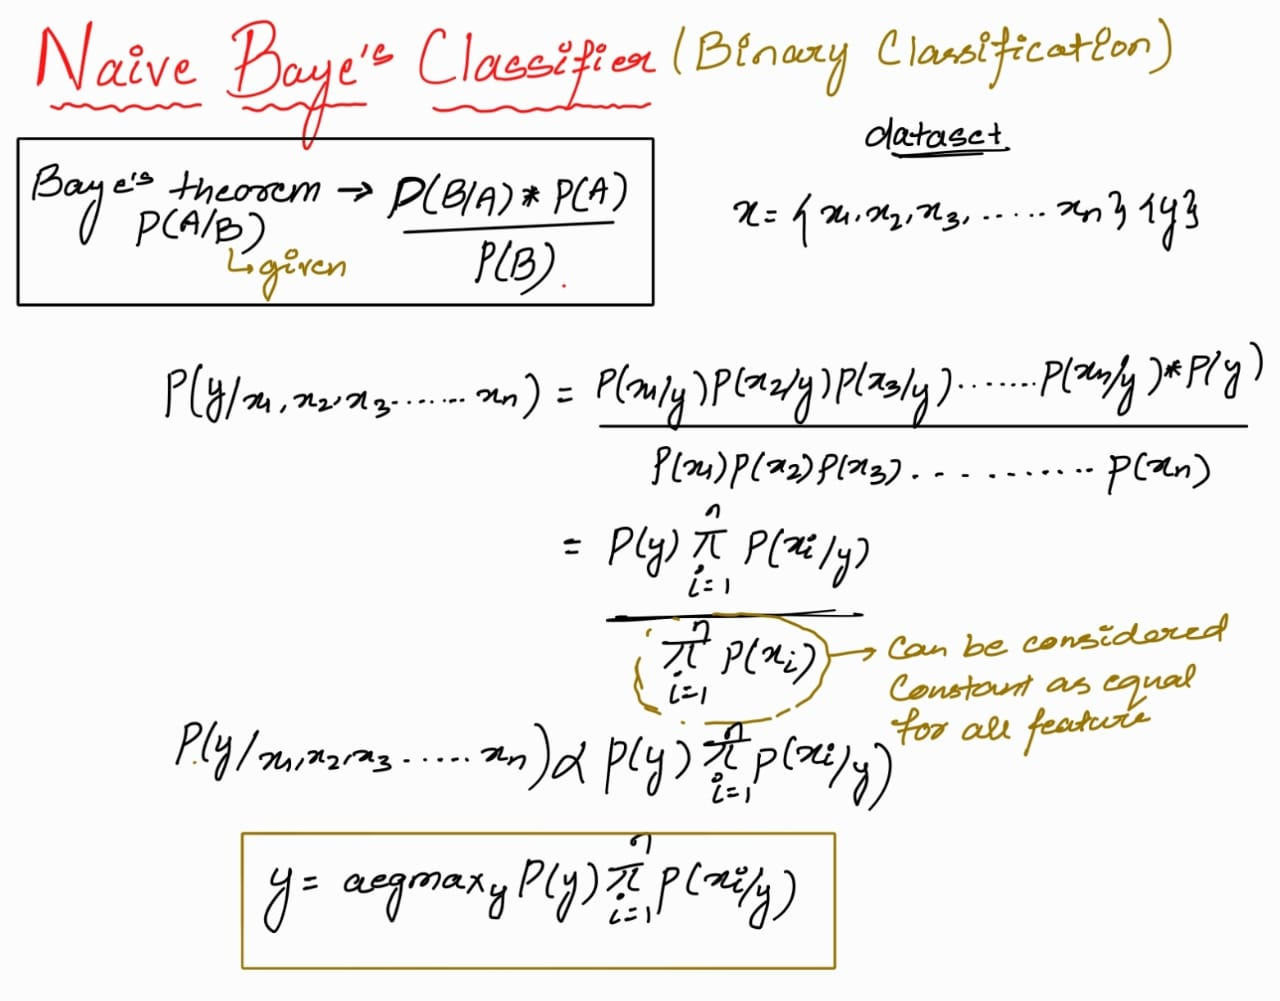

In [37]:
gnb.fit(x_train_bow,y_train)

GaussianNB()

In [38]:
y_pred = gnb.predict(x_test_bow)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_pred)

0.6324486730095142

In [39]:
confusion_matrix(y_test,y_pred)

array([[717, 235],
       [499, 546]])

In [40]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(x_train_bow,y_train)
y_pred = rf.predict(x_test_bow)
accuracy_score(y_test,y_pred)

0.8382573860791187

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.metrics import accuracy_score # Import accuracy_score

cv = CountVectorizer(max_features=3000)

x_train_bow = cv.fit_transform(x_train['review']).toarray()
x_test_bow = cv.transform(x_test['review']).toarray()

rf = RandomForestClassifier()

rf.fit(x_train_bow,y_train)
y_pred = rf.predict(x_test_bow)
accuracy_score(y_test,y_pred)

0.8332498748122183

#N-gram#


In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.metrics import accuracy_score # Import accuracy_score

cv = CountVectorizer(ngram_range=(2,2),max_features=5000)

x_train_bow = cv.fit_transform(x_train['review']).toarray()
x_test_bow = cv.transform(x_test['review']).toarray()

rf = RandomForestClassifier()

rf.fit(x_train_bow,y_train)
y_pred = rf.predict(x_test_bow)
accuracy_score(y_test,y_pred)


0.7406109163745619

## **TF-IDF**

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.metrics import accuracy_score # Import accuracy_score
tfidf = TfidfVectorizer()

In [47]:
x_train_tfidf = tfidf.fit_transform(x_train['review']).toarray()
x_test_tfidf = tfidf.transform(x_test['review']).toarray()

rf = RandomForestClassifier()
rf.fit(x_train_tfidf,y_train)
y_pred=rf.predict(x_test_tfidf)
accuracy_score(y_test,y_pred)

0.8487731597396094